# Bibliotecas

In [119]:
# Manipulação de dados
import pandas as pd
import yfinance as yf

# Estatística
import numpy as np
from scipy import stats

# Visualização
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

# Ações

In [ ]:
data_in = "2018-01-01"
data_out = "2022-12-31"

vale3 = yf.download("VALE3.SA", start=data_in, end=data_out)
nvda = yf.download("NVDA", start=data_in, end=data_out)
amd = yf.download("AMD", start=data_in, end=data_out)
intc = yf.download("INTC", start=data_in, end=data_out)
tsla = yf.download("TSLA", start=data_in, end=data_out)
amzn = yf.download("AMZN", start=data_in, end=data_out)

# Visualização básica das ações

**Preço ajustado ao longo do tempo**

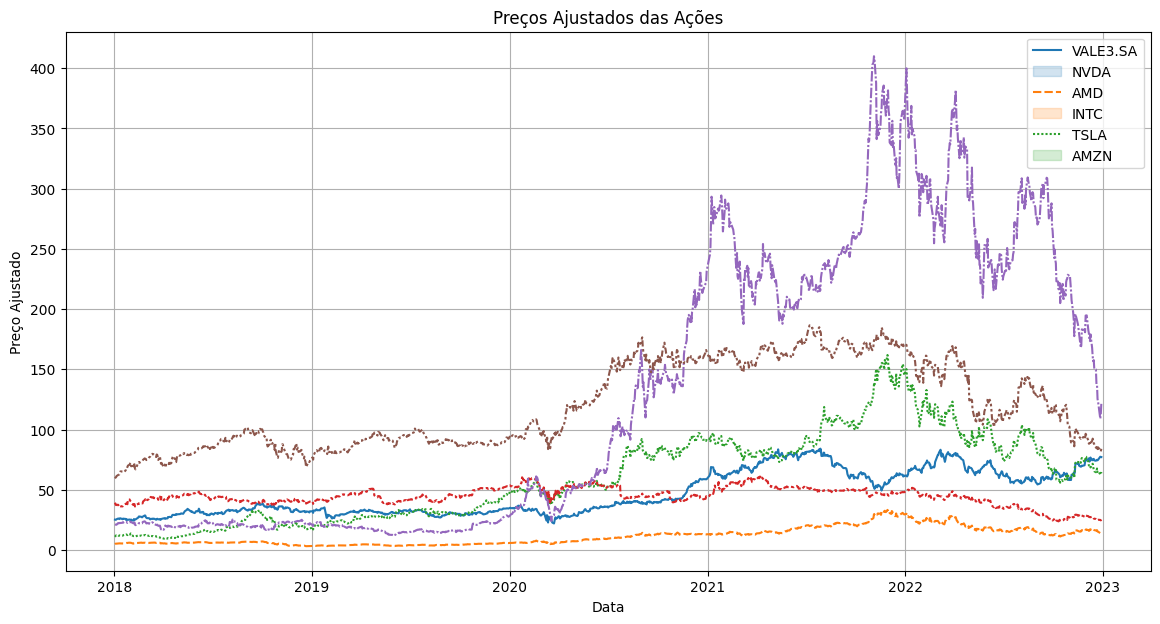

In [121]:
acoes = pd.concat(
    {
        "VALE3.SA": vale3["Adj Close"],
        "NVDA": nvda["Adj Close"],
        "AMD": amd["Adj Close"],
        "INTC": intc["Adj Close"],
        "TSLA": tsla["Adj Close"],
        "AMZN": amzn["Adj Close"],
    },
    axis=1,
).dropna()

plt.figure(figsize=(14, 7))
sns.lineplot(data=acoes)
plt.xlabel("Data")
plt.ylabel("Preço Ajustado")
plt.title("Preços Ajustados das Ações")
plt.legend(labels=acoes.columns)
plt.grid(True)
plt.show()

**Média móvel dos últimos 20 dias do preço de fechamento e bandas de Bollinger**

In [122]:
nvda["SMA20"] = nvda["Adj Close"].rolling(window=20).mean()
nvda["Desvio20"] = nvda["Adj Close"].rolling(window=20).std()
nvda["Banda Superior"] = nvda["SMA20"] + (nvda["Desvio20"] * 2)
nvda["Banda Inferior"] = nvda["SMA20"] - (nvda["Desvio20"] * 2)

In [123]:
data_zoom_in = "2022-01-01"
data_zoom_out = "2022-12-31"
nvda_zoom = nvda.loc[data_zoom_in:data_zoom_out]

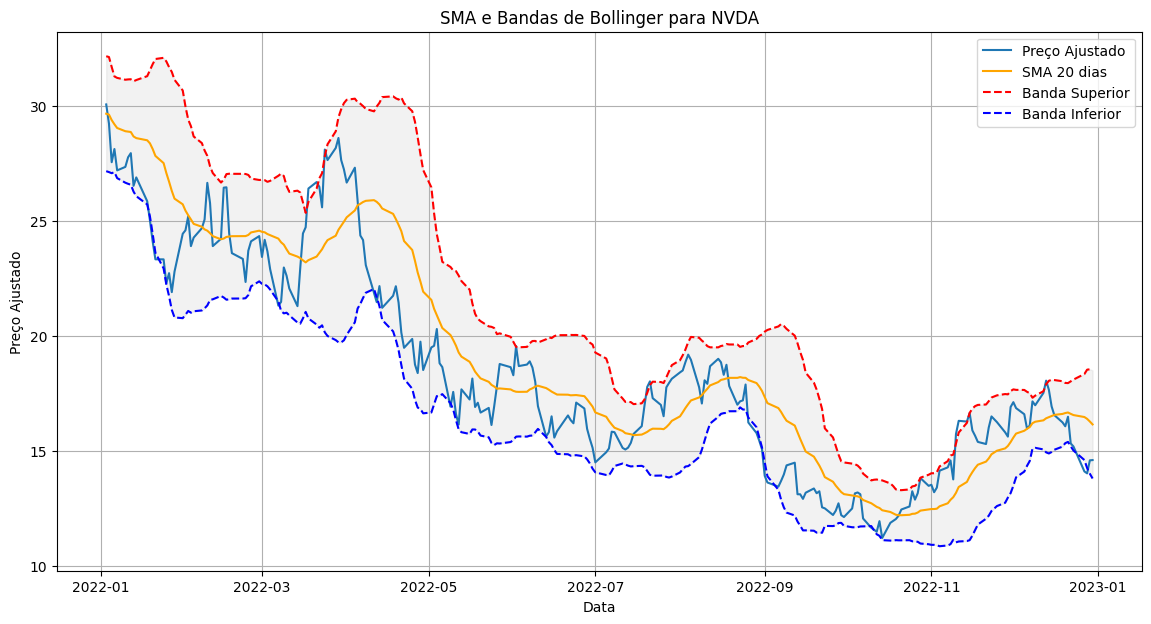

In [124]:
plt.figure(figsize=(14, 7))
sns.lineplot(data=nvda_zoom, x=nvda_zoom.index, y="Adj Close", label="Preço Ajustado")
sns.lineplot(
    data=nvda_zoom, x=nvda_zoom.index, y="SMA20", label="SMA 20 dias", color="orange"
)
sns.lineplot(
    data=nvda_zoom,
    x=nvda_zoom.index,
    y="Banda Superior",
    label="Banda Superior",
    linestyle="--",
    color="red",
)
sns.lineplot(
    data=nvda_zoom,
    x=nvda_zoom.index,
    y="Banda Inferior",
    label="Banda Inferior",
    linestyle="--",
    color="blue",
)
plt.fill_between(
    nvda_zoom.index,
    nvda_zoom["Banda Inferior"],
    nvda_zoom["Banda Superior"],
    color="gray",
    alpha=0.1,
)
plt.xlabel("Data")
plt.ylabel("Preço Ajustado")
plt.title("SMA e Bandas de Bollinger para NVDA")
plt.legend()
plt.grid(True)
plt.show()

**Volume e preço ajustado**

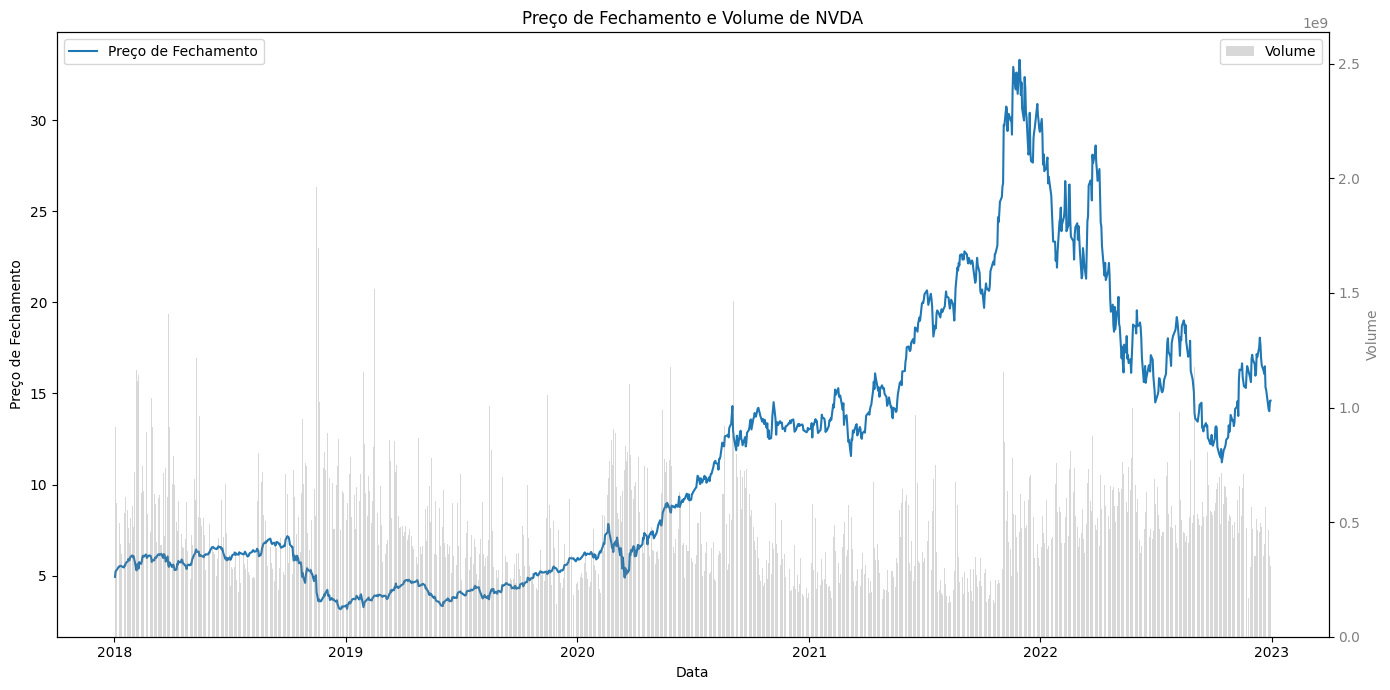

In [125]:
fig, ax1 = plt.subplots(figsize=(14, 7))

sns.lineplot(
    data=nvda,
    x=nvda.index,
    y="Adj Close",
    ax=ax1,
    label="Preço de Fechamento",
)
ax1.set_xlabel("Data")
ax1.set_ylabel("Preço de Fechamento")
ax1.tick_params(axis="y")

ax2 = ax1.twinx()
ax2.bar(nvda.index, nvda["Volume"], color="gray", alpha=0.3, width=1.0, label="Volume")
ax2.set_ylabel("Volume", color="gray")
ax2.tick_params(axis="y", labelcolor="gray")

plt.title("Preço de Fechamento e Volume de NVDA")
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")
fig.tight_layout()
plt.show()

**Disperção entre ações**

In [126]:
nvda_amd = pd.concat(
    {
        "NVDA": nvda["Adj Close"],
        "AMD": amd["Adj Close"],
    },
    axis=1,
)

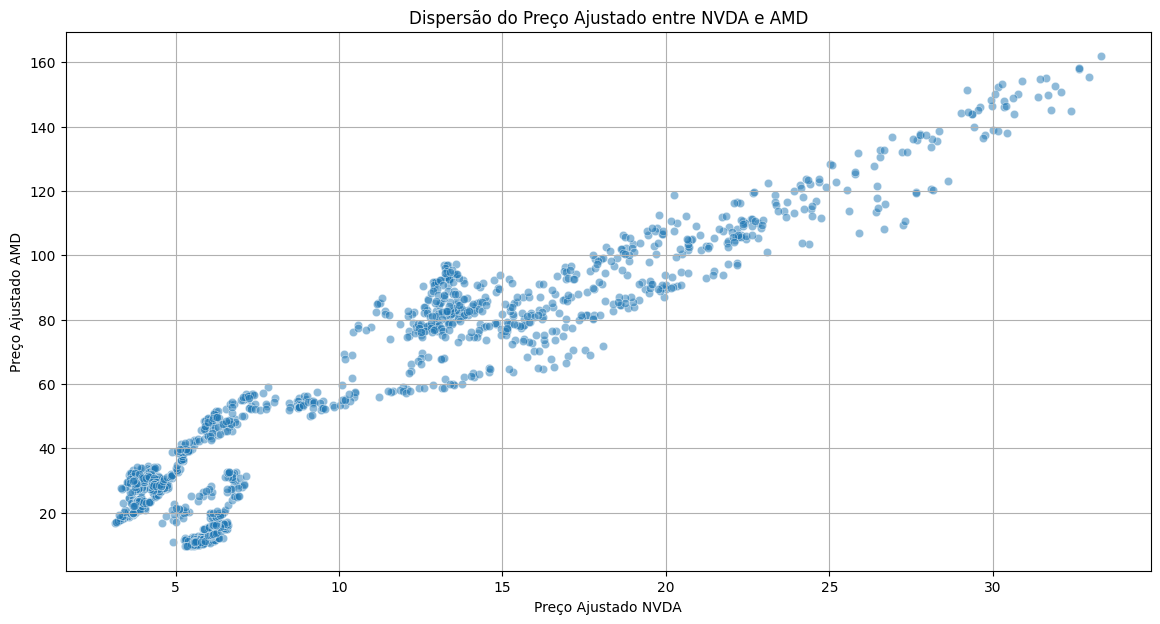

In [127]:
plt.figure(figsize=(14, 7))
sns.scatterplot(data=nvda_amd, x="NVDA", y="AMD", alpha=0.5)
plt.xlabel("Preço Ajustado NVDA")
plt.ylabel("Preço Ajustado AMD")
plt.title("Dispersão do Preço Ajustado entre NVDA e AMD")
plt.grid(True)
plt.show()

**Candle-stick**

In [128]:
nvda_zoom_2x = nvda.loc["2022-06-01":"2022-12-01"]

fig = go.Figure(
    data=[
        go.Candlestick(
            x=nvda_zoom_2x.index,
            open=nvda_zoom_2x["Open"],
            high=nvda_zoom_2x["High"],
            low=nvda_zoom_2x["Low"],
            close=nvda_zoom_2x["Close"],
        )
    ]
)

fig.update_layout(
    title="Gráfico de Candlestick para NVDA",
    xaxis_title="Data",
    yaxis_title="Preço",
    xaxis_rangeslider_visible=False,
)

fig.show()

# Retornos

In [129]:
preco_inicial = nvda["Adj Close"].iloc[0]
preco_final = nvda["Adj Close"].iloc[-1]
print(f"Preço inicial: {preco_inicial:.4f}\nPreço final: {preco_final:.4f}")

Preço inicial: 4.9306
Preço final: 14.6056


**Retorno total discreto (simples)**

In [130]:
retorno_discreto = (preco_final - preco_inicial) / preco_inicial
print(f"Retorno total discreto: {retorno_discreto:.4f}")

Retorno total discreto: 1.9622


In [131]:
nvda["Retorno Simples"] = nvda["Adj Close"].pct_change().dropna()
nvda["Retorno Simples"].tail()

Date
2022-12-23   -0.008671
2022-12-27   -0.071353
2022-12-28   -0.006019
2022-12-29    0.040396
2022-12-30    0.000753
Name: Retorno Simples, dtype: float64

**Retorno total logarítmico**

In [132]:
retorno_logaritmico = np.log(preco_final / preco_inicial)
print(f"Retorno total logarítmico: {retorno_logaritmico:.4f}")

Retorno total logarítmico: 1.0859


In [133]:
nvda["Retorno Logarítmico"] = np.log(nvda["Adj Close"] / nvda["Adj Close"].shift(1))
nvda["Retorno Logarítmico"].tail()

Date
2022-12-23   -0.008709
2022-12-27   -0.074027
2022-12-28   -0.006038
2022-12-29    0.039602
2022-12-30    0.000753
Name: Retorno Logarítmico, dtype: float64

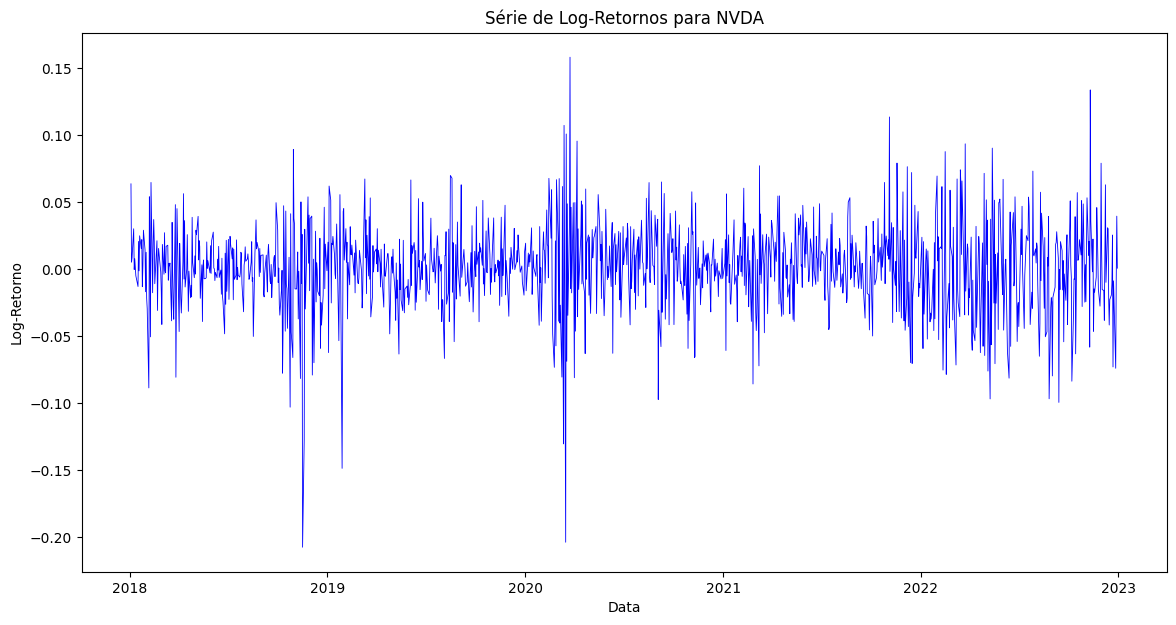

In [134]:
plt.figure(figsize=(14, 7))
sns.lineplot(
    data=nvda,
    x=nvda.index,
    y="Retorno Logarítmico",
    color="blue",
    linewidth=0.6,
)
plt.xlabel("Data")
plt.ylabel("Log-Retorno")
plt.title("Série de Log-Retornos para NVDA")
plt.show()

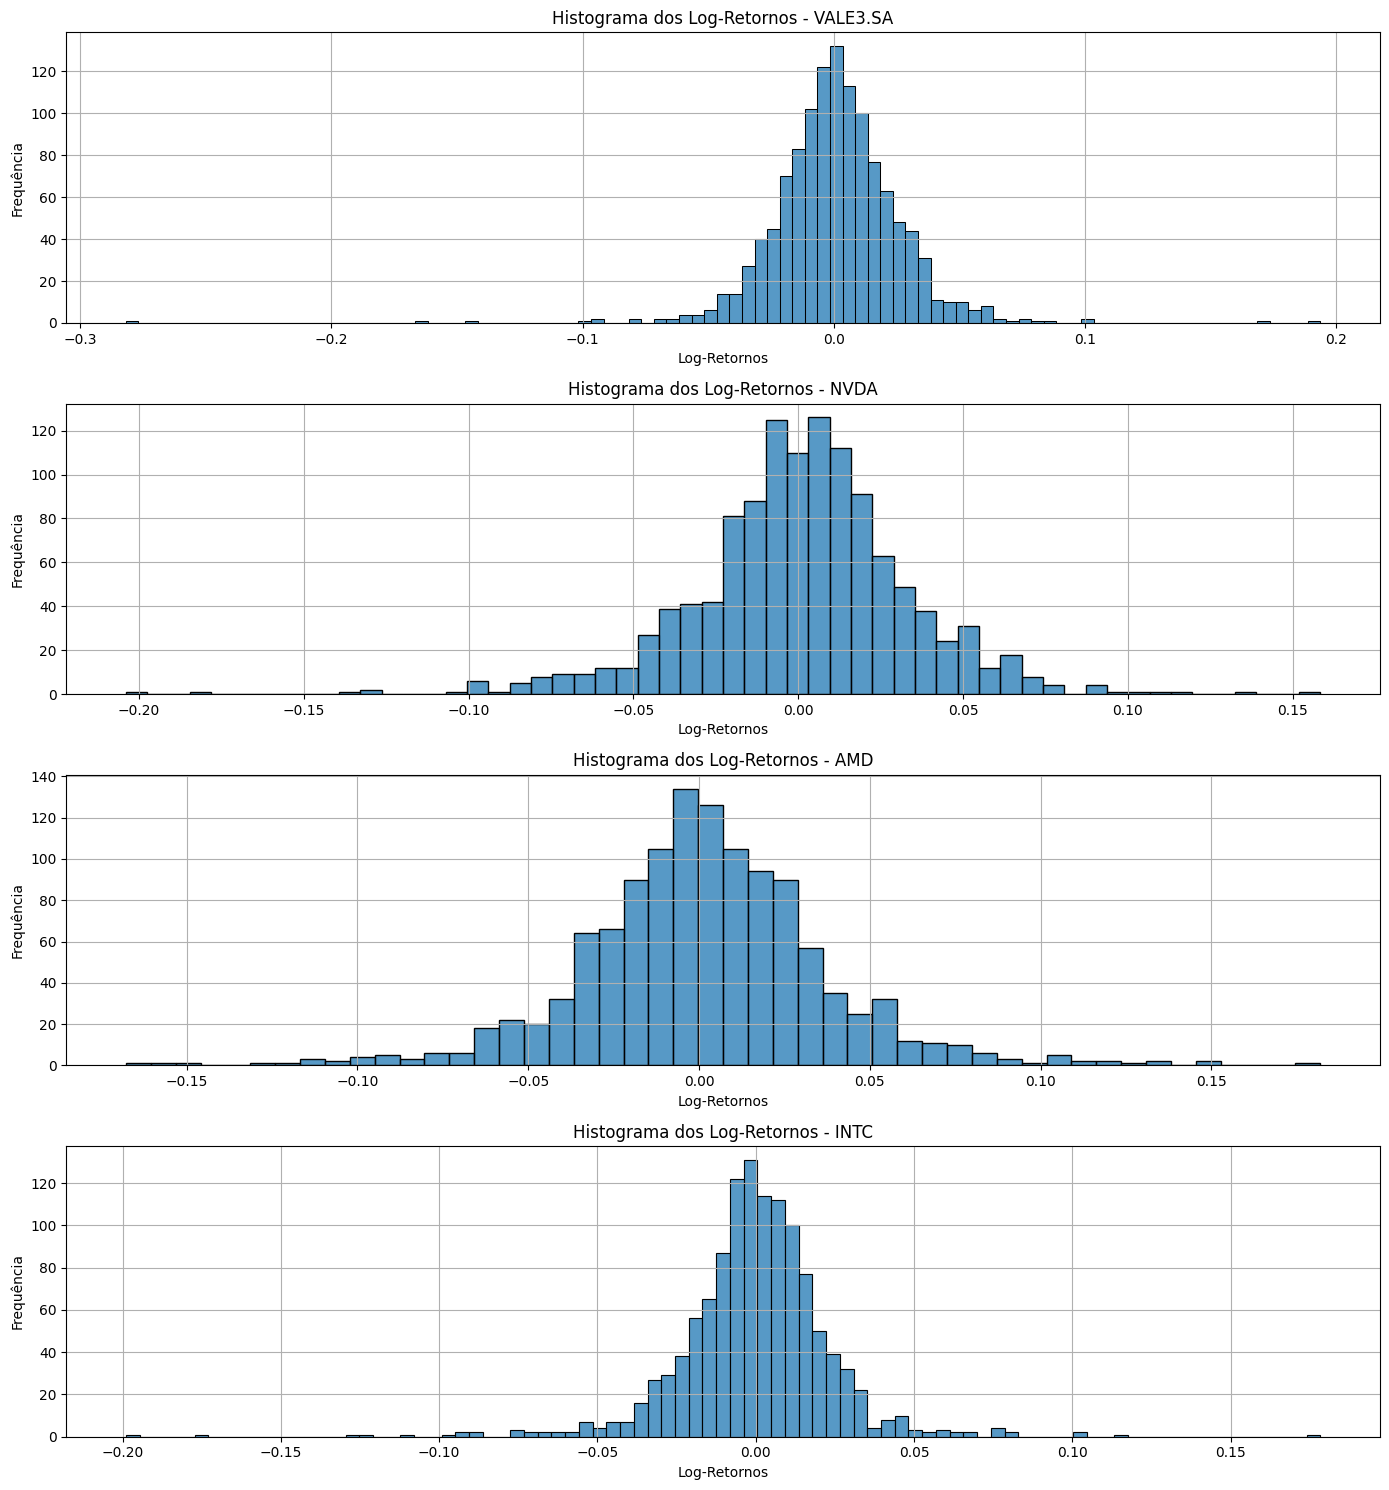

In [135]:
acoes_retornos_diarios = np.log(acoes / acoes.shift(1)).dropna()
acoes_lista = acoes.columns[:4]

plt.figure(figsize=(14, 15))

for i, ticker in enumerate(acoes_lista, start=1):
    plt.subplot(len(acoes_lista), 1, i)
    sns.histplot(retornos_diarios[ticker])
    plt.title(f"Histograma dos Log-Retornos - {ticker}")
    plt.xlabel("Log-Retornos")
    plt.ylabel("Frequência")
    plt.grid()

plt.tight_layout()

**Estatísticas**

In [136]:
estatisticas = {}
for ticker in acoes.columns:
    log_retorno = acoes_retornos_diarios[ticker]
    estatisticas[ticker] = {
        "Amostra": len(log_retorno),
        "Mínimo": log_retorno.min(),
        "Máximo": log_retorno.max(),
        "Média": log_retorno.mean(),
        "Desvio Padrão": log_retorno.std(),
        "Skew": skew(log_retorno),
        "Kurtosis": kurtosis(log_retorno),
    }

estatisticas_df = pd.DataFrame(estatisticas).T
estatisticas_df

,Amostra,Mínimo,Máximo,Média,Desvio Padrão,Skew,Kurtosis
VALE3.SA,1207.0,-0.281822,0.193574,0.000926,0.026328,-0.769682,16.605099
NVDA,1207.0,-0.203979,0.158340,0.000899,0.033058,-0.421843,3.208740
AMD,1207.0,-0.167772,0.181889,0.001471,0.036011,0.059492,2.659412
INTC,1207.0,-0.198958,0.178324,-0.000366,0.024382,-0.702035,10.935616
TSLA,1207.0,-0.236518,0.181445,0.001442,0.041612,-0.180375,3.726580
AMZN,1207.0,-0.151398,0.126949,0.000288,0.023013,-0.192274,3.964278


In [137]:
resultados_testes = {}
for ticker in acoes.columns:
    log_retorno = acoes_retornos_diarios[ticker]
    resultados_testes[ticker] = {
        "Skewness p-valor": skewtest(log_retorno)[1],
        "Kurtosis p-valor": kurtosistest(log_retorno)[1],
        "Normalidade p-valor": normaltest(log_retorno)[1],
    }

resultados_testes_df = pd.DataFrame(resultados_testes).T
resultados_testes_df

,Skewness p-valor,Kurtosis p-valor,Normalidade p-valor
VALE3.SA,1.053569e-22,2.134304e-64,5.949492e-84
NVDA,7.304573e-09,1.104084e-22,7.460718e-29
AMD,3.963112e-01,3.498358e-19,2.772412e-18
INTC,1.021693e-19,1.036897e-52,2.347772e-69
TSLA,1.065376e-02,9.897772e-26,5.033210e-26
AMZN,6.538474e-03,4.706033e-27,1.587520e-27


## Volatilidade

In [138]:
volatilidade_diaria = nvda["Retorno Simples"].std()
volatilidade_anualizada = volatilidade_diaria * np.sqrt(252)
print(f"Volatilidade Histórica: {volatilidade_diaria:.4f}")
print(f"Volatilidade Anualizada: {volatilidade_anualizada:.4f}")

Volatilidade Histórica: 0.0327
Volatilidade Anualizada: 0.5189


In [139]:
nvda["STD Móvel"] = nvda["Retorno Simples"].rolling(window=30).std()
nvda["SMA"] = desvio_padrao_movel.rolling(window=30).mean()
nvda["EWMA"] = nvda["Retorno Simples"].ewm(span=30, adjust=False).std()

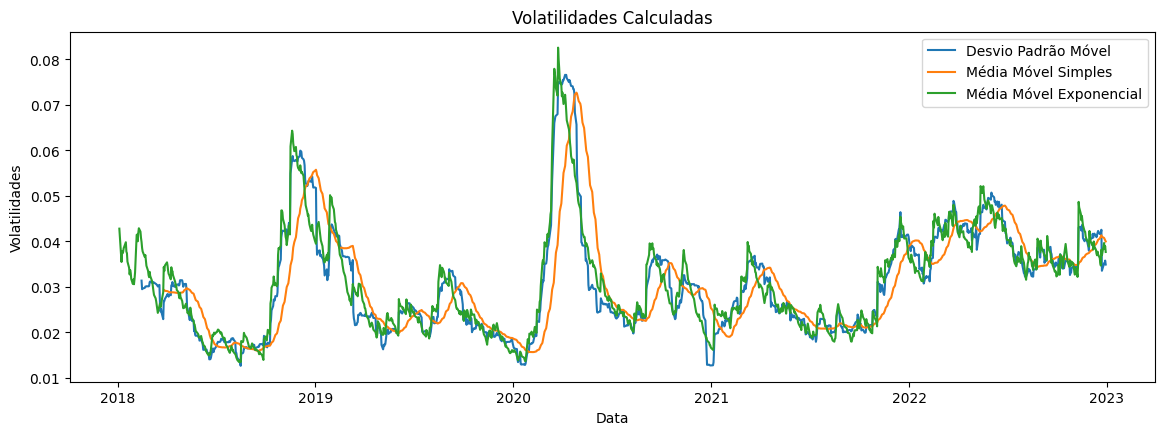

In [140]:
plt.figure(figsize=(14, 10))
plt.subplot(2, 1, 1)
sns.lineplot(data=nvda, x=nvda.index, y="STD Móvel", label="Desvio Padrão Móvel")
sns.lineplot(data=nvda, x=nvda.index, y="SMA", label="Média Móvel Simples")
sns.lineplot(data=nvda, x=nvda.index, y="EWMA", label="Média Móvel Exponencial")
plt.legend()
plt.title("Volatilidades Calculadas")
plt.xlabel("Data")
plt.ylabel("Volatilidades")
plt.show()

**VaR e CVaR**

In [153]:
def calcular_var_cvar(retornos, alpha=0.05):
    var = np.percentile(retornos, 100 * alpha)
    cvar = retornos[retornos <= var].mean()
    return var, cvar


var_vale3, cvar_vale3 = calcular_var_cvar(acoes_retornos_diarios["VALE3.SA"])
var_nvda, cvar_nvda = calcular_var_cvar(acoes_retornos_diarios["NVDA"])

In [154]:
def calcular_var_cvar_parametrico(retornos, alpha=0.05):
    media = retornos.mean()
    desvio_padrao = retornos.std()
    var_parametrico = stats.norm.ppf(alpha, loc=media, scale=desvio_padrao)
    cvar_parametrico = media - desvio_padrao * (
        stats.norm.pdf(stats.norm.ppf(alpha)) / alpha
    )
    return var_parametrico, cvar_parametrico


var_vale3_parametrico, cvar_vale3_parametrico = calcular_var_cvar_parametrico(
    retornos_diarios["VALE3.SA"]
)
var_nvda_parametrico, cvar_nvda_parametrico = calcular_var_cvar_parametrico(
    retornos_diarios["NVDA"]
)

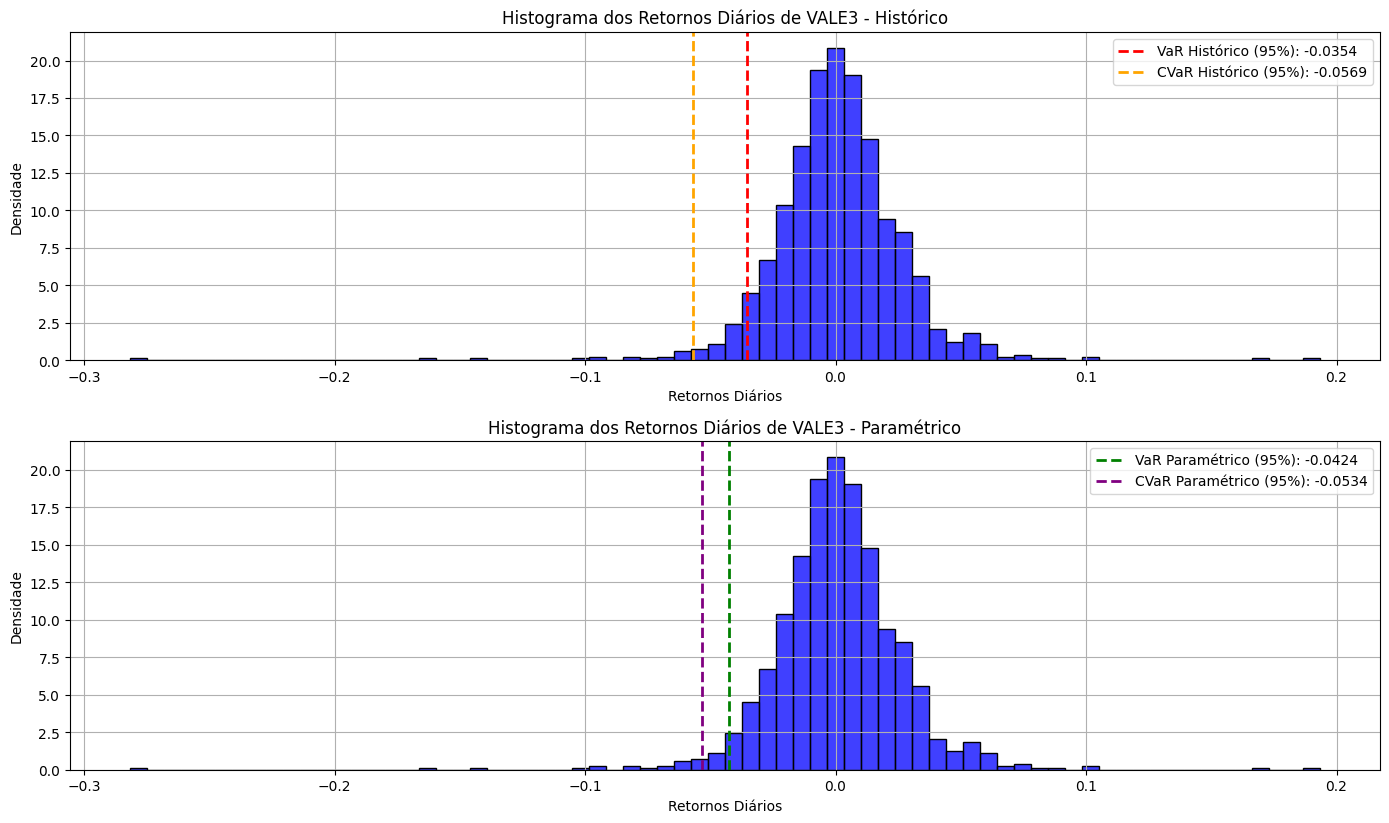

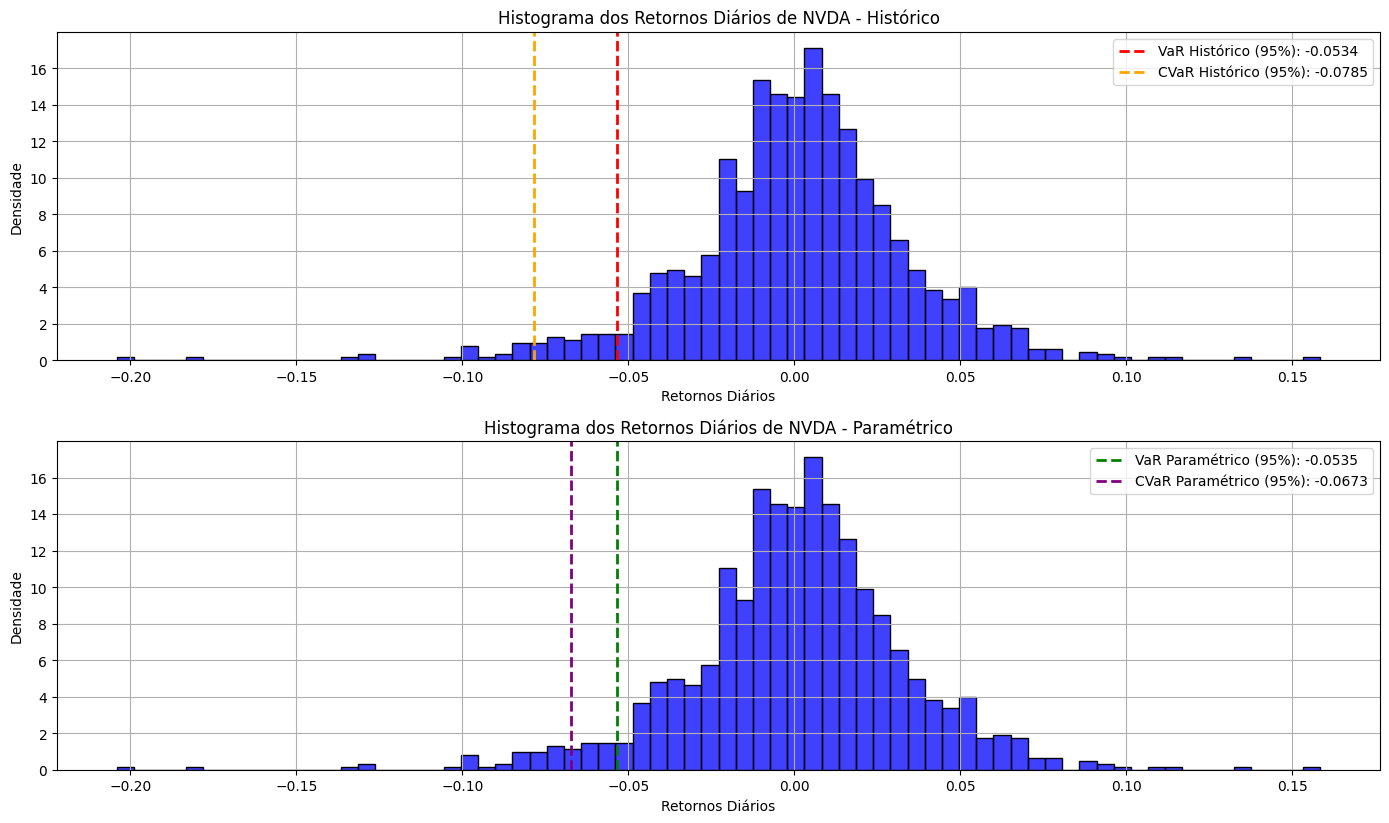

In [164]:
def plotar_histograma(retornos, var, cvar, var_parametrico, cvar_parametrico, ticker):
    plt.figure(figsize=(14, 12))

    # Histograma Histórico
    plt.subplot(3, 1, 1)
    sns.histplot(
        retornos, bins=70, kde=False, color="blue", edgecolor="black", stat="density"
    )
    plt.axvline(
        var,
        color="red",
        linestyle="dashed",
        linewidth=2,
        label=f"VaR Histórico (95%): {var:.4f}",
    )
    plt.axvline(
        cvar,
        color="orange",
        linestyle="dashed",
        linewidth=2,
        label=f"CVaR Histórico (95%): {cvar:.4f}",
    )
    plt.title(f"Histograma dos Retornos Diários de {ticker} - Histórico")
    plt.xlabel("Retornos Diários")
    plt.ylabel("Densidade")
    plt.legend()
    plt.grid(True)

    # Histograma Paramétrico
    plt.subplot(3, 1, 2)
    sns.histplot(
        retornos, bins=70, kde=False, color="blue", edgecolor="black", stat="density"
    )
    plt.axvline(
        var_parametrico,
        color="green",
        linestyle="dashed",
        linewidth=2,
        label=f"VaR Paramétrico (95%): {var_parametrico:.4f}",
    )
    plt.axvline(
        cvar_parametrico,
        color="purple",
        linestyle="dashed",
        linewidth=2,
        label=f"CVaR Paramétrico (95%): {cvar_parametrico:.4f}",
    )
    plt.title(f"Histograma dos Retornos Diários de {ticker} - Paramétrico")
    plt.xlabel("Retornos Diários")
    plt.ylabel("Densidade")
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()


plotar_histograma(
    retornos_diarios["VALE3.SA"],
    var_vale3,
    cvar_vale3,
    var_vale3_parametrico,
    cvar_vale3_parametrico,
    "VALE3",
)
plotar_histograma(
    retornos_diarios["NVDA"],
    var_nvda,
    cvar_nvda,
    var_nvda_parametrico,
    cvar_nvda_parametrico,
    "NVDA",
)

# Portfolio de investimentos

In [167]:
tickers = acoes.columns


def calcular_retorno_anualizado(precos):
    preco_inicial = precos.iloc[0]
    preco_final = precos.iloc[-1]
    anos = (precos.index[-1] - precos.index[0]).days / 365.25
    retorno_total = (preco_final / preco_inicial) - 1
    retorno_anualizado = (1 + retorno_total) ** (1 / anos) - 1
    return retorno_anualizado


retorno_anualizado = {
    ticker: calcular_retorno_anualizado(acoes[ticker]) for ticker in tickers
}

for ticker, retorno in retorno_anualizado.items():
    print(f"{ticker} - Retorno Anualizado: {retorno:.4%}")

VALE3.SA - Retorno Anualizado: 25.1029%
NVDA - Retorno Anualizado: 24.3019%
AMD - Retorno Anualizado: 42.7516%
INTC - Retorno Anualizado: -8.4837%
TSLA - Retorno Anualizado: 41.7558%
AMZN - Retorno Anualizado: 7.2213%


In [168]:
pesos = np.array([1 / len(tickers)] * len(tickers))
retornos_portfolio = acoes_retornos_diarios.dot(pesos)
volatilidade_diaria = retornos_portfolio.std()
volatilidade_anualizada = volatilidade_diaria * np.sqrt(252)

print(f"Volatilidade Anualizada do Portfólio: {volatilidade_anualizada:.4%}")

Volatilidade Anualizada do Portfólio: 36.0100%


[*********************100%%**********************]  1 of 1 completed


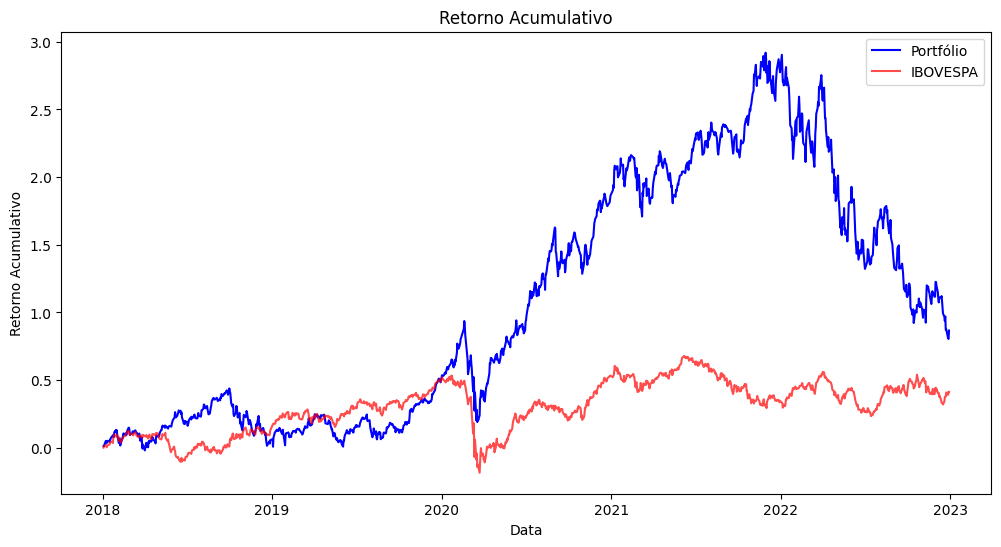

In [169]:
ibov = yf.download("^BVSP", start=data_in, end=data_out)["Adj Close"]

retornos_ibov = ibov.pct_change().dropna()

retorno_acumulativo_portfolio = (1 + retornos_portfolio).cumprod() - 1
retorno_acumulativo_ibov = (1 + retornos_ibov).cumprod() - 1

plt.figure(figsize=(12, 6))
sns.lineplot(data=retorno_acumulativo_portfolio, label="Portfólio", color="blue")
sns.lineplot(data=retorno_acumulativo_ibov, label="IBOVESPA", color="red", alpha=0.7)
plt.title("Retorno Acumulativo")
plt.xlabel("Data")
plt.ylabel("Retorno Acumulativo")
plt.legend()
plt.show()

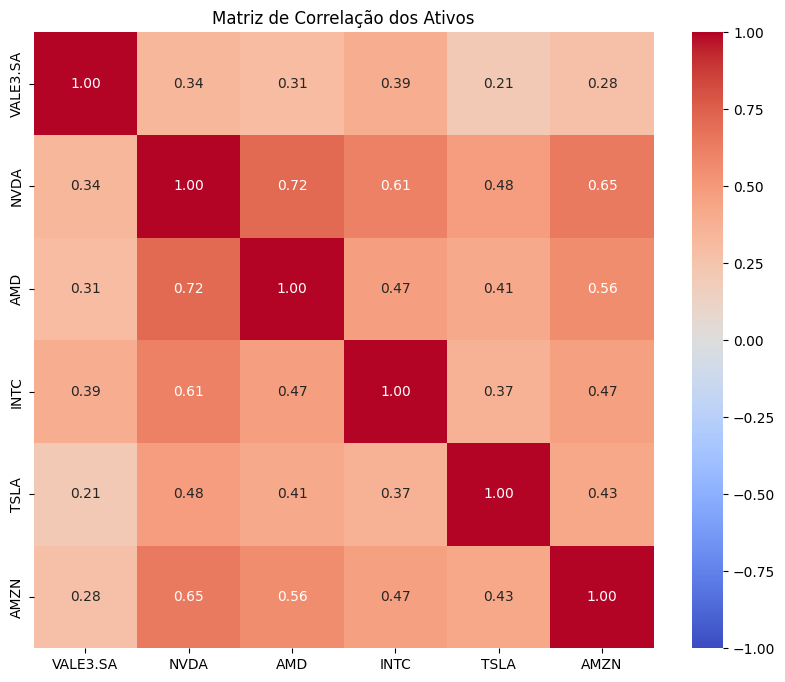

In [170]:
matriz_correlacao = retornos_diarios.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(
    matriz_correlacao, annot=True, cmap="coolwarm", fmt=".2f", vmin=-1, vmax=1, center=0
)
plt.title("Matriz de Correlação dos Ativos")
plt.show()

In [171]:
var_portfolio, cvar_portfolio = calcular_var_cvar(retornos_portfolio)
var_parametrico_portfolio, cvar_parametrico_portfolio = calcular_var_cvar_parametrico(
    retornos_portfolio
)

print(f"VaR Histórico do Portfólio: {var_portfolio:.4%}")
print(f"CVaR Histórico do Portfólio: {cvar_portfolio:.4%}")
print(f"VaR Paramétrico do Portfólio: {var_parametrico_portfolio:.4%}")
print(f"CVaR Paramétrico do Portfólio: {cvar_parametrico_portfolio:.4%}")

VaR Histórico do Portfólio: -3.5642%
CVaR Histórico do Portfólio: -5.4501%
VaR Paramétrico do Portfólio: -3.6535%
CVaR Paramétrico do Portfólio: -4.6014%
